<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-9-2867271427.py:37: RuntimeWarning: invalid value encountered in divide
  G_D_G_T = G_D / G_T


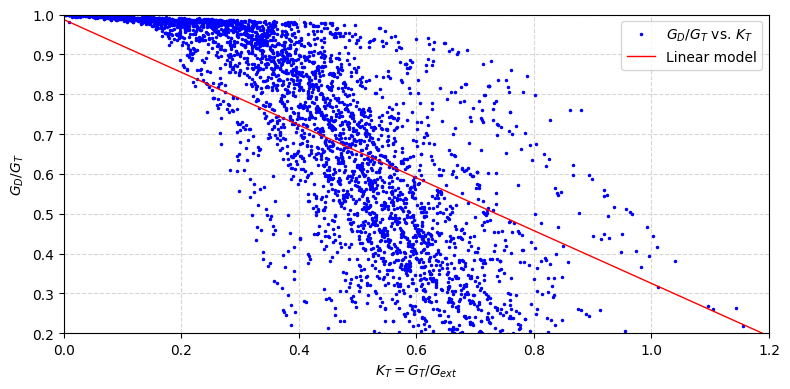

In [9]:
#Example 1.8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/content/PV Modeling Book Data Source.csv'
data = pd.read_csv(file_path)

N = pd.to_numeric(data.iloc[:, 2], errors='coerce')
LMT = pd.to_numeric(data.iloc[:, 3], errors='coerce')
G_T = pd.to_numeric(data.iloc[:, 4], errors='coerce')
G_D = pd.to_numeric(data.iloc[:, 5], errors='coerce')


valid = N.notna() & LMT.notna() & G_T.notna() & G_D.notna()
N = N[valid].to_numpy()
LMT = LMT[valid].to_numpy()
G_T = G_T[valid].to_numpy()
G_D = G_D[valid].to_numpy()

# Constants
L = 3.11
Go = 1367


Ts = LMT
Ds = 23.45 * np.sin(np.radians((360 * (N - 81)) / 365))
Hs = 15 * (Ts - 12)

sin_Alpha = (np.sin(np.radians(L)) * np.sin(np.radians(Ds)) +
             np.cos(np.radians(L)) * np.cos(np.radians(Ds)) * np.cos(np.radians(Hs)))

Gext = Go * (1 + 0.0333 * np.cos(np.radians(360 * N / 365)))
GextH = Gext * sin_Alpha
G_T_G_ext = G_T / GextH
G_D_G_T = G_D / G_T


valid_mask = np.isfinite(G_T_G_ext) & np.isfinite(G_D_G_T)
G_T_G_ext = G_T_G_ext[valid_mask]
G_D_G_T = G_D_G_T[valid_mask]

# Linear model fitting
P_Liner = np.polyfit(G_T_G_ext, G_D_G_T, 1)
X_Liner = np.linspace(min(G_T_G_ext), max(G_T_G_ext), 100)
Y_Liner = np.polyval(P_Liner, X_Liner)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(G_T_G_ext, G_D_G_T, 'b.', markersize=3, label=r'$G_D/G_T$ vs. $K_T$')
plt.plot(X_Liner, Y_Liner, 'r-', linewidth=1, label='Linear model')
plt.xlabel(r'$K_T = G_T/G_{ext}$')
plt.ylabel(r'$G_D/G_T$')
plt.xlim(0, 1.2)
plt.ylim(0.2, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
